Use new york city data set and remove outliers using percentile based on price per night for a given apartment/home. You can use suitable upper and lower limits on percentile based on your intuition. Your goal is to come up with new pandas dataframe that doesn't have the outliers present in it.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.shape

(48895, 16)

In [4]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [5]:
df['price'].isnull().any()

False

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

{'whiskers': [<matplotlib.lines.Line2D at 0x27494734220>,
 'caps': [<matplotlib.lines.Line2D at 0x274947348e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2749471ce80>],
 'medians': [<matplotlib.lines.Line2D at 0x27494734fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2749473d2e0>],
 'means': []}

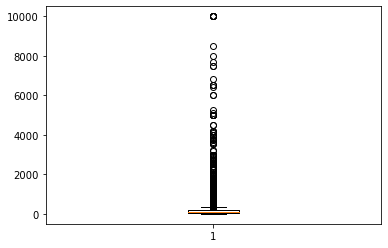

In [7]:
plt.boxplot(df.price)

In [8]:
upper_limit = df.price.quantile(0.9)
lower_limit = df.price.quantile(0.01)
upper_limit, lower_limit

(269.0, 30.0)

In [9]:
df = df[(df['price']<upper_limit)&(df['price']>lower_limit)]
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [10]:
df.shape

(43325, 16)

In [11]:
df.price.describe()

count    43325.000000
mean       113.523970
std         57.883562
min         31.000000
25%         65.000000
50%        100.000000
75%        150.000000
max        268.000000
Name: price, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x27494c4abb0>,
 'caps': [<matplotlib.lines.Line2D at 0x27494c562b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27494c4a850>],
 'medians': [<matplotlib.lines.Line2D at 0x27494c56970>],
 'fliers': [<matplotlib.lines.Line2D at 0x27494c56c70>],
 'means': []}

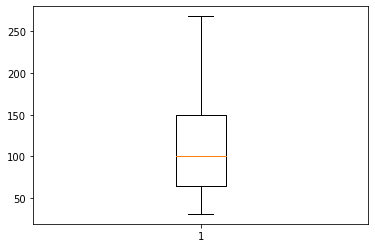

In [12]:
plt.boxplot(df.price)